## Step 1: Reading  Data

In [1431]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [1432]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1433]:
# Reading dataset

leadInfo = pd.read_csv('Leads.csv')
leadInfo.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

### Observation
1. Some columns contains value "Select" which seems to be default value of the front end system.

## Step 2: Understanding  Data

In [1434]:
leadInfo.shape

(9240, 37)

In [1435]:
leadInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1436]:
# check for percentage of null values in each column

round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Observation
1. Some columns contains null values more than 30% of the total rows.

In [1437]:
# Check if there are any duplicate values in the dataset

leadInfo[leadInfo.duplicated(keep=False)]

Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Lead Quality, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

### Observation
1. no duplicate rows are observed

## Step 3: Data Cleaning

#### 3.1 Replace Default value "Select" with "NAN"


In [1438]:
leadInfo=leadInfo.replace("Select",np.nan)
leadInfo.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                      NaN                                NaN   
1   India                      NaN                                NaN   
2   India  Business Administration                                NaN   
3   India    Media and Advertising                      Word Of Mouth   
4   India                      NaN                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No             NaN   
1                                No                        No             NaN   
2                                No                        No  Potential Lead   
3                            

In [1439]:
# check for percentage of null values in each column

round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### 3.2 Remove columns with more than 30% of null values

In [1440]:
leadInfo = leadInfo.drop(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality',
                          'Lead Profile','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                          'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [1441]:
# check for percentage of null values in each column

round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### 3.3 Imputing NAN values


In [1442]:
#checking percentage of each value in the column COUNTRY
round((leadInfo.groupby('Country').agg('count')/len(leadInfo))*100,2)['Prospect ID'].sort_values(ascending=False)

Country
India                   70.26
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Hong Kong                0.08
Bahrain                  0.08
Oman                     0.06
France                   0.06
unknown                  0.05
South Africa             0.04
Canada                   0.04
Nigeria                  0.04
Germany                  0.04
Kuwait                   0.04
Sweden                   0.03
Belgium                  0.02
Bangladesh               0.02
China                    0.02
Ghana                    0.02
Asia/Pacific Region      0.02
Italy                    0.02
Netherlands              0.02
Philippines              0.02
Uganda                   0.02
Indonesia                0.01
Kenya                    0.01
Liberia                  0.01
Vietnam                  0.01
Denmark                  0.01
Ru

### Observation
1. As the value INDIA in the column COUNTRY is occuring 70% this value can be used to impute NAN values in the column

In [1443]:
leadInfo['Country']=leadInfo['Country'].replace(np.nan,'India')
round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Country                                           0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [1444]:
#checking percentage of each value in the column COUNTRY
round((leadInfo.groupby('What matters most to you in choosing a course').agg('count')/len(leadInfo))*100,2)['Prospect ID'].sort_values(ascending=False)

What matters most to you in choosing a course
Better Career Prospects      70.65
Flexibility & Convenience     0.02
Other                         0.01
Name: Prospect ID, dtype: float64

### Observation
1. As the value "Better Career Prospects" in the column "What matters most to you in choosing a course" is occuring 70% this value can be used to impute NAN values in the column

In [1445]:
leadInfo['What matters most to you in choosing a course']=leadInfo['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')
round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2).sort_values(ascending=False)

What is your current occupation                  29.11
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Last Notable Activity                             0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Country                                           0.00
What matters most to you in choosing a course     0.00
A free copy of Mastering The Interview            0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [1446]:
#checking percentage of each value in the column "What is your current occupation"
round((leadInfo.groupby('What is your current occupation').agg('count')/len(leadInfo))*100,2)['Prospect ID'].sort_values(ascending=False)

What is your current occupation
Unemployed              60.61
Working Professional     7.64
Student                  2.27
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: Prospect ID, dtype: float64

### Observation
1. As the value "Unemployed" in the column "What is your current occupation" is occuring 60% this value can be used to impute NAN values in the column

In [1447]:
leadInfo['What is your current occupation']=leadInfo['What is your current occupation'].replace(np.nan,'Unemployed')
round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2).sort_values(ascending=False)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Last Notable Activity                            0.00
What is your current occupation                  0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
Total Time Spent on Website                      0.00
Country                                          0.00
What matters most to you in choosing a course    0.00
A free copy of Mastering The Interview           0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

#### 3.3 Removing NAN rows which is less than 2% of total column


In [1448]:
leadInfo.dropna(inplace=True)
round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2).sort_values(ascending=False)

Last Notable Activity                            0.0
What is your current occupation                  0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What matters most to you in choosing a course    0.0
A free copy of Mastering The Interview           0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [1449]:
leadInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

## Task 4: Outliers

Text(0.5, 1.0, "'Page Views Per Visit'\n")

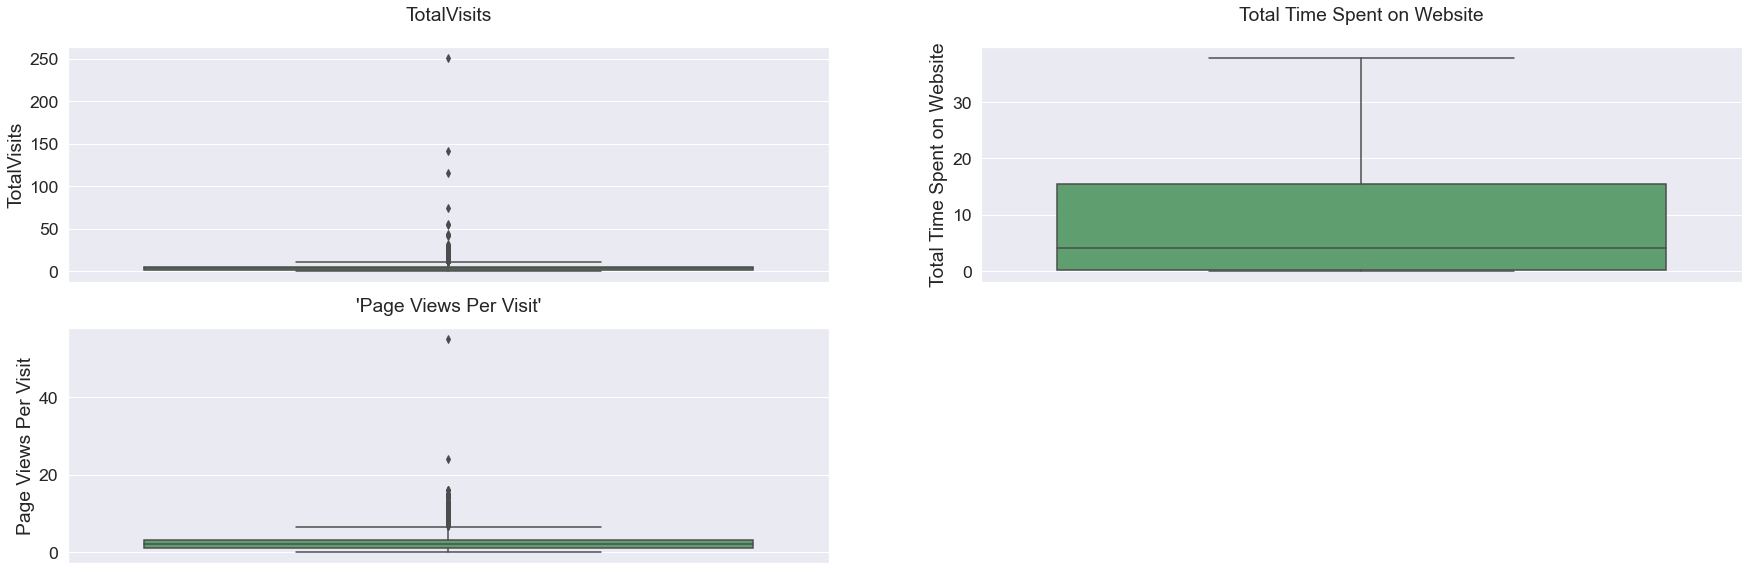

In [1450]:
plt.figure(1, figsize=(30, 25))
sns.set(font_scale=1.6)

# subplot 1:
plt.subplot(5, 2, 1)
sns.boxplot(y='TotalVisits', data=leadInfo,color='g')
plt.title("TotalVisits\n")
#plt.yscale('log')

leadInfo['Total Time Spent on Website']=round(leadInfo['Total Time Spent on Website']/60,2)
# subplot 2:
plt.subplot(5, 2, 2)
sns.boxplot(y='Total Time Spent on Website', data=leadInfo,color='g')
plt.title("Total Time Spent on Website\n")

# subplot 3:
plt.subplot(5, 2, 3)
sns.boxplot(y='Page Views Per Visit', data=leadInfo,color='g')
plt.title("'Page Views Per Visit'\n",pad=-4.0)

In [1451]:
#diff1 will provide the difference between outliers and 99th percentile. If the value is too big, we can conclude that there are outliers.
diff1 = leadInfo.TotalVisits.max() - leadInfo.TotalVisits.quantile(0.97)
print('Outliers  count in TotalVisits :',diff1)

#Selecting only 97 percentile of data to remove outliers 
q1_TotalVisits=leadInfo['TotalVisits'].quantile(0.97)
leadInfo=leadInfo[leadInfo['TotalVisits']<q1_TotalVisits]

#diff2 will provide the difference between outliers and 99th percentile. If the value is too big, we can conclude that there are outliers.
diff2 = leadInfo['Page Views Per Visit'].max() - leadInfo['Page Views Per Visit'].quantile(0.97)
print('Outliers count in Page Views :',diff2)

q2_pageview=leadInfo['Page Views Per Visit'].quantile(0.97)
leadInfo=leadInfo[leadInfo['Page Views Per Visit']<q2_pageview]

Outliers  count in TotalVisits : 240.0
Outliers count in Page Views : 3.0


Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    8445.000000  8445.000000  8445.000000                  8445.000000   
mean   617000.027472     0.374778     2.754174                     7.809509   
std     23289.142312     0.484094     2.330357                     9.028326   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596376.000000     0.000000     0.000000                     0.000000   
50%    615473.000000     0.000000     2.000000                     3.880000   
75%    637048.000000     1.000000     4.000000                    14.770000   
90%    649865.000000     1.000000     6.000000                    22.700000   
95%    655237.400000     1.000000     7.000000                    25.800000   
99%    659558.920000     1.000000    10.000000                    30.430000   
max    660737.000000     1.000000    10.000000                    37.870000   

       Page Views Per Visit  
count           8445.000000  
mean               2.071957  
std                1.649040  
min                0.000000  
25%                0.000000  
50%                2.000000  
75%                3.000000  
90%                4.000000  
95%                5.000000  
99%                6.000000  
max                6.000000

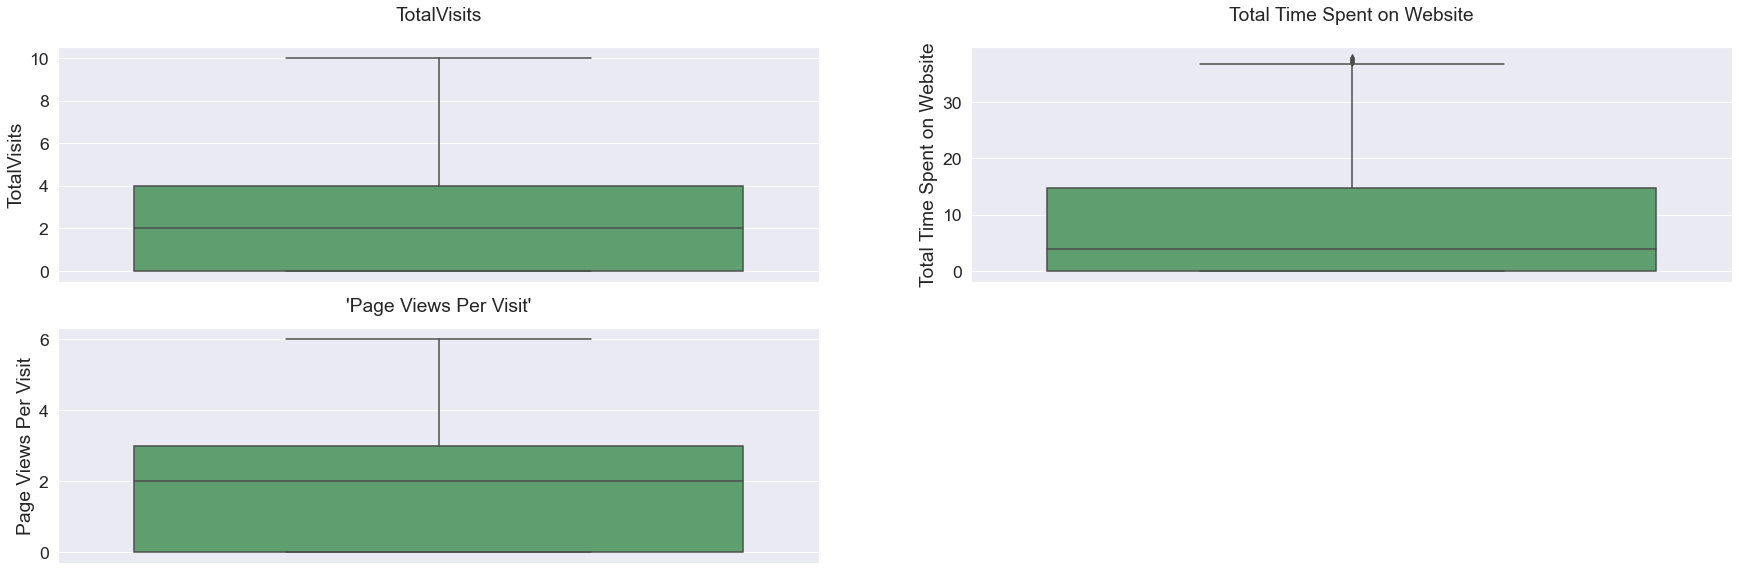

In [1452]:
plt.figure(1, figsize=(30, 25))
sns.set(font_scale=1.6)

# subplot 1:
plt.subplot(5, 2, 1)
sns.boxplot(y='TotalVisits', data=leadInfo,color='g')
plt.title("TotalVisits\n")
#plt.yscale('log')

# subplot 2:
plt.subplot(5, 2, 2)
sns.boxplot(y='Total Time Spent on Website', data=leadInfo,color='g')
plt.title("Total Time Spent on Website\n")

# subplot 3:
plt.subplot(5, 2, 3)
sns.boxplot(y='Page Views Per Visit', data=leadInfo,color='g')
plt.title("'Page Views Per Visit'\n",pad=-4.0)


leadInfo.describe(percentiles=[.25,.5,.75,.90,.95,.99])

## Task 5: Normalizing Data

In [1453]:
leadInfo['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.521847
API                        0.406513
Lead Add Form              0.068206
Lead Import                0.003434
Name: Lead Origin, dtype: float64

In [1454]:
leadInfo['Do Not Email'].value_counts(normalize=True)

No     0.923031
Yes    0.076969
Name: Do Not Email, dtype: float64

In [1455]:
leadInfo['Converted'].value_counts(normalize=True)

0    0.625222
1    0.374778
Name: Converted, dtype: float64

In [1456]:
print(leadInfo['A free copy of Mastering The Interview'].value_counts(normalize=True))

No     0.699822
Yes    0.300178
Name: A free copy of Mastering The Interview, dtype: float64


In [1457]:
print(leadInfo['TotalVisits'].value_counts(normalize=True)*100)

0.0     25.589106
2.0     19.881587
3.0     15.464772
4.0     13.262285
5.0      9.271758
6.0      5.518058
1.0      4.677324
7.0      2.178804
8.0      1.669627
9.0      1.409118
10.0     1.077561
Name: TotalVisits, dtype: float64


In [1458]:
pd.set_option('display.max_rows', None)
print(leadInfo['Total Time Spent on Website'].value_counts(normalize=True)*100)

0.00     25.636471
3.90      0.201303
2.12      0.201303
1.00      0.189461
1.03      0.189461
2.62      0.189461
1.45      0.189461
1.25      0.177620
0.20      0.177620
1.23      0.177620
0.53      0.177620
3.55      0.177620
1.67      0.165779
1.18      0.165779
1.57      0.165779
0.55      0.165779
0.60      0.165779
1.15      0.165779
2.52      0.165779
0.03      0.165779
2.93      0.153937
2.08      0.153937
1.05      0.153937
4.12      0.153937
1.60      0.153937
3.88      0.153937
0.23      0.153937
0.27      0.153937
4.52      0.153937
0.52      0.153937
2.15      0.153937
2.07      0.153937
4.20      0.142096
2.30      0.142096
2.83      0.142096
2.17      0.142096
3.60      0.142096
3.85      0.142096
0.82      0.142096
0.58      0.142096
3.02      0.142096
2.55      0.142096
3.17      0.142096
3.80      0.142096
4.38      0.142096
3.47      0.142096
2.57      0.142096
2.63      0.142096
0.75      0.142096
4.78      0.142096
6.60      0.130255
1.78      0.130255
2.77      0.

In [1459]:
print('***************************Before****************************')
print(leadInfo['Lead Source'].value_counts(normalize=True)*100)
leadInfo['Lead Source'] = leadInfo['Lead Source'].replace('google', 'Google')
leadInfo['Lead Source'] = leadInfo['Lead Source'].replace(['Reference','Welingak','Website','Referral Sites','Facebook','bing',
                                                           'google','Click2call','Live Chat','Social Media','Press_Release',
                                                           'testone','NC_EDM','blog','youtubechannel','Pay per Click Ads',
                                                           'WeLearn','welearnblog_Home','Welingak Website'
                                                          ], 'Others')
print('\n\n***************************After****************************')
leadInfo['Lead Source'].value_counts(normalize=True)*100

***************************Before****************************
Google               32.078153
Direct Traffic       27.815275
Olark Chat           20.627590
Organic Search       10.882179
Reference             5.210184
Welingak Website      1.515690
Referral Sites        1.207815
Facebook              0.355240
bing                  0.071048
google                0.059207
Click2call            0.035524
Live Chat             0.023683
Social Media          0.023683
youtubechannel        0.011841
Pay per Click Ads     0.011841
welearnblog_Home      0.011841
WeLearn               0.011841
Press_Release         0.011841
testone               0.011841
NC_EDM                0.011841
blog                  0.011841
Name: Lead Source, dtype: float64


***************************After****************************


Google            32.137359
Direct Traffic    27.815275
Olark Chat        20.627590
Organic Search    10.882179
Others             8.537596
Name: Lead Source, dtype: float64

In [1460]:
print('***************************Before****************************')
pd.set_option('display.max_rows', None)
print(leadInfo['Page Views Per Visit'].value_counts(normalize=True)*100)
print('\n\n***************************After****************************')
leadInfo['Page Views Per Visit']=round(leadInfo['Page Views Per Visit'])
print(leadInfo['Page Views Per Visit'].value_counts(normalize=True)*100)
#leadInfo['Page Views Per Visit']=pd.cut(leadInfo['Page Views Per Visit'],[-1,0.0,3.0,999.0],labels=['0','0-3','>3'])
#print(leadInfo['Page Views Per Visit'].value_counts(normalize=True))

***************************Before****************************
0.00    25.589106
2.00    21.172291
3.00    13.949082
4.00    10.455891
1.00     7.708703
5.00     6.050918
1.50     3.599763
2.50     2.830077
6.00     2.723505
3.50     1.030195
1.33     0.781528
1.67     0.710480
2.33     0.686797
2.67     0.603908
4.50     0.473653
1.75     0.331557
3.33     0.319716
1.25     0.272351
2.25     0.213144
1.80     0.153937
1.40     0.118413
1.60     0.094731
1.20     0.059207
1.43     0.047365
1.17     0.011841
1.14     0.011841
Name: Page Views Per Visit, dtype: float64


***************************After****************************
2.0    29.792777
0.0    25.589106
3.0    14.872706
4.0    11.959739
1.0     9.011249
5.0     6.050918
6.0     2.723505
Name: Page Views Per Visit, dtype: float64


In [1461]:
print('***************************Before****************************')
print(leadInfo['Last Activity'].value_counts(normalize=True)*100)
leadInfo['Last Activity'] = leadInfo['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked',
                                                           'Approached upfront','Email Marked Spam','Email Received',
                                                           'Visited Booth in Tradeshow','Resubscribed to emails'
                                                          ], 'Others')
print('\n\n***************************After****************************')
print(leadInfo['Last Activity'].value_counts(normalize=True)*100)

***************************Before****************************
Email Opened                    37.702783
SMS Sent                        30.041445
Olark Chat Conversation         11.178212
Page Visited on Website          6.074600
Converted to Lead                5.032564
Email Bounced                    3.576081
Email Link Clicked               3.007697
Form Submitted on Website        1.302546
Unreachable                      0.994671
Unsubscribed                     0.674956
Had a Phone Conversation         0.236827
Approached upfront               0.059207
View in browser link Clicked     0.047365
Email Received                   0.023683
Email Marked Spam                0.023683
Resubscribed to emails           0.011841
Visited Booth in Tradeshow       0.011841
Name: Last Activity, dtype: float64


***************************After****************************
Email Opened                 37.702783
SMS Sent                     30.041445
Olark Chat Conversation      11.178212
Page Vis

In [1462]:
print('***************************Before****************************')
print(leadInfo['Country'].value_counts(normalize=True)*100)
leadInfo['Country'].mask(leadInfo['Country'] != 'India', 'Outside India', inplace=True)
print('\n\n***************************After****************************')
print(leadInfo['Country'].value_counts(normalize=True)*100)

***************************Before****************************
India                   96.838366
United States            0.769686
United Arab Emirates     0.556542
Singapore                0.272351
Saudi Arabia             0.236827
United Kingdom           0.153937
Australia                0.142096
Qatar                    0.118413
Bahrain                  0.082889
Hong Kong                0.082889
Oman                     0.071048
France                   0.059207
unknown                  0.047365
Canada                   0.047365
Nigeria                  0.047365
Germany                  0.047365
Kuwait                   0.047365
South Africa             0.035524
Ghana                    0.023683
China                    0.023683
Belgium                  0.023683
Asia/Pacific Region      0.023683
Philippines              0.023683
Uganda                   0.023683
Italy                    0.023683
Bangladesh               0.023683
Sweden                   0.023683
Liberia             

In [1463]:
print('***************************Before****************************')
print(leadInfo['What is your current occupation'].value_counts(normalize=True)*100)
leadInfo['What is your current occupation'] = leadInfo['What is your current occupation'].replace(['Other','Housewife',
                                                           'Businessman'
                                                          ], 'Others')
print('\n\n***************************After****************************')
print(leadInfo['What is your current occupation'].value_counts(normalize=True)*100)

***************************Before****************************
Unemployed              89.899349
Working Professional     7.460036
Student                  2.332741
Other                    0.142096
Housewife                0.106572
Businessman              0.059207
Name: What is your current occupation, dtype: float64


***************************After****************************
Unemployed              89.899349
Working Professional     7.460036
Student                  2.332741
Others                   0.307874
Name: What is your current occupation, dtype: float64


In [1464]:
print('***************************Before****************************')
print(leadInfo['Last Notable Activity'].value_counts(normalize=True)*100)
leadInfo['Last Notable Activity'] = leadInfo['Last Notable Activity'].replace(['Email Bounced','Unsubscribed',
                                                           'Unreachable','Had a Phone Conversation','Email Marked Spam',
                                                           'Approached upfront','View in browser link Clicked',
                                                           'Email Received','Form Submitted on Website',
                                                           'Resubscribed to emails'
                                                          ], 'Others')
print('\n\n***************************After****************************')
print(leadInfo['Last Notable Activity'].value_counts(normalize=True)*100)

***************************Before****************************
Modified                        36.802842
Email Opened                    30.882179
SMS Sent                        23.789224
Page Visited on Website          2.818236
Olark Chat Conversation          2.048549
Email Link Clicked               1.894612
Email Bounced                    0.698638
Unsubscribed                     0.509177
Unreachable                      0.355240
Had a Phone Conversation         0.118413
Email Marked Spam                0.023683
Email Received                   0.011841
Form Submitted on Website        0.011841
View in browser link Clicked     0.011841
Resubscribed to emails           0.011841
Approached upfront               0.011841
Name: Last Notable Activity, dtype: float64


***************************After****************************
Modified                   36.802842
Email Opened               30.882179
SMS Sent                   23.789224
Page Visited on Website     2.818236
Olark Chat 

In [1465]:
print(leadInfo['Do Not Call'].value_counts(normalize=True)*100)
#this column can be removed as about 99% of values are "NO"
leadInfo = leadInfo.drop(['Do Not Call'], axis=1)

No     99.976317
Yes     0.023683
Name: Do Not Call, dtype: float64


In [1466]:
print(leadInfo['What matters most to you in choosing a course'].value_counts(normalize=True)*100)
#this column can be removed as about 99% of values are "NO"
leadInfo = leadInfo.drop(['What matters most to you in choosing a course'], axis=1)

Better Career Prospects      99.976317
Flexibility & Convenience     0.011841
Other                         0.011841
Name: What matters most to you in choosing a course, dtype: float64


In [1467]:
print(leadInfo['Search'].value_counts(normalize=True)*100)
#this column can be removed as about 99% of values are "NO"
leadInfo = leadInfo.drop(['Search'], axis=1)

No     99.928952
Yes     0.071048
Name: Search, dtype: float64


In [1468]:
print(leadInfo['Magazine'].value_counts(normalize=True)*100)
#this column can be removed as about 100% of values are "NO"
leadInfo = leadInfo.drop(['Magazine'], axis=1)

No    100.0
Name: Magazine, dtype: float64


In [1469]:
print(leadInfo['Newspaper Article'].value_counts(normalize=True)*100)
#this column can be removed as about 100% of values are "NO"
leadInfo = leadInfo.drop(['Newspaper Article'], axis=1)

No    100.0
Name: Newspaper Article, dtype: float64


In [1470]:
print(leadInfo['X Education Forums'].value_counts(normalize=True)*100)
#this column can be removed as about 100% of values are "NO"
leadInfo = leadInfo.drop(['X Education Forums'], axis=1)

No    100.0
Name: X Education Forums, dtype: float64


In [1471]:
print(leadInfo['Newspaper'].value_counts(normalize=True)*100)
#this column can be removed as about 99% of values are "NO"
leadInfo = leadInfo.drop(['Newspaper'], axis=1)

No     99.988159
Yes     0.011841
Name: Newspaper, dtype: float64


In [1472]:
print(leadInfo['Digital Advertisement'].value_counts(normalize=True)*100)
#this column can be removed as about 99% of values are "NO"
leadInfo = leadInfo.drop(['Digital Advertisement'], axis=1)

No     99.976317
Yes     0.023683
Name: Digital Advertisement, dtype: float64


In [1473]:
print(leadInfo['Through Recommendations'].value_counts(normalize=True)*100)
#this column can be removed as about 99% of values are "NO"
leadInfo = leadInfo.drop(['Through Recommendations'], axis=1)

No     99.964476
Yes     0.035524
Name: Through Recommendations, dtype: float64


In [1474]:
print(leadInfo['Receive More Updates About Our Courses'].value_counts(normalize=True)*100)
#this column can be removed as about 100% of values are "NO"
leadInfo = leadInfo.drop(['Receive More Updates About Our Courses'], axis=1)

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64


In [1475]:
print(leadInfo['Update me on Supply Chain Content'].value_counts(normalize=True)*100)
#this column can be removed as about 100% of values are "NO"
leadInfo = leadInfo.drop(['Update me on Supply Chain Content'], axis=1)

No    100.0
Name: Update me on Supply Chain Content, dtype: float64


In [1476]:
print(leadInfo['I agree to pay the amount through cheque'].value_counts(normalize=True)*100)
#this column can be removed as about 100% of values are "NO"
leadInfo = leadInfo.drop(['I agree to pay the amount through cheque'], axis=1)

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64


In [1477]:
print(leadInfo['Get updates on DM Content'].value_counts(normalize=True)*100)
#this column can be removed as about 100% of values are "NO"
leadInfo = leadInfo.drop(['Get updates on DM Content'], axis=1)

No    100.0
Name: Get updates on DM Content, dtype: float64


In [1478]:
leadInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8445 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             8445 non-null   object 
 1   Lead Number                             8445 non-null   int64  
 2   Lead Origin                             8445 non-null   object 
 3   Lead Source                             8445 non-null   object 
 4   Do Not Email                            8445 non-null   object 
 5   Converted                               8445 non-null   int64  
 6   TotalVisits                             8445 non-null   float64
 7   Total Time Spent on Website             8445 non-null   float64
 8   Page Views Per Visit                    8445 non-null   float64
 9   Last Activity                           8445 non-null   object 
 10  Country                                 8445 non-null   obje

## Task 6: Data Imbalance

Spread of data between Converted Variable:

customers who are converted to leads:=  3165
customers who are not converted to leads:=  5280
Percentage of customers who are converted to leads:=  37.5
Percentage of customers who are not converted to leads:=  62.5


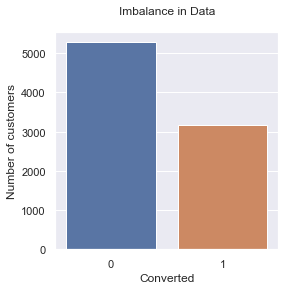

In [1479]:
# Let us check the data imbalance by assessing the percentage of rows with TARGET=1 and 0
targets=leadInfo.groupby('Converted').count()['Prospect ID']

plt.figure(1, figsize=(4,4))
sns.set(font_scale=1)
sns.barplot(x=targets.index, y=targets.values, label='Converted')
plt.xlabel('Converted')
plt.ylabel('Number of customers')
plt.title('Imbalance in Data\n')


print("Spread of data between Converted Variable:\n");
print('customers who are converted to leads:= ',targets[1])
print('customers who are not converted to leads:= ',targets[0])
imbalance_defaulter=round((targets[1]/(targets[0]+targets[1]))*100,1)
print('Percentage of customers who are converted to leads:= ',imbalance_defaulter)
print('Percentage of customers who are not converted to leads:= ',(100-imbalance_defaulter) )

## Task 7: EDA


### Task 7.1: Univariate Analysis

In [1480]:
leadInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8445 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             8445 non-null   object 
 1   Lead Number                             8445 non-null   int64  
 2   Lead Origin                             8445 non-null   object 
 3   Lead Source                             8445 non-null   object 
 4   Do Not Email                            8445 non-null   object 
 5   Converted                               8445 non-null   int64  
 6   TotalVisits                             8445 non-null   float64
 7   Total Time Spent on Website             8445 non-null   float64
 8   Page Views Per Visit                    8445 non-null   float64
 9   Last Activity                           8445 non-null   object 
 10  Country                                 8445 non-null   obje

#### Task 7.1.1: Visualising Numerical Variables

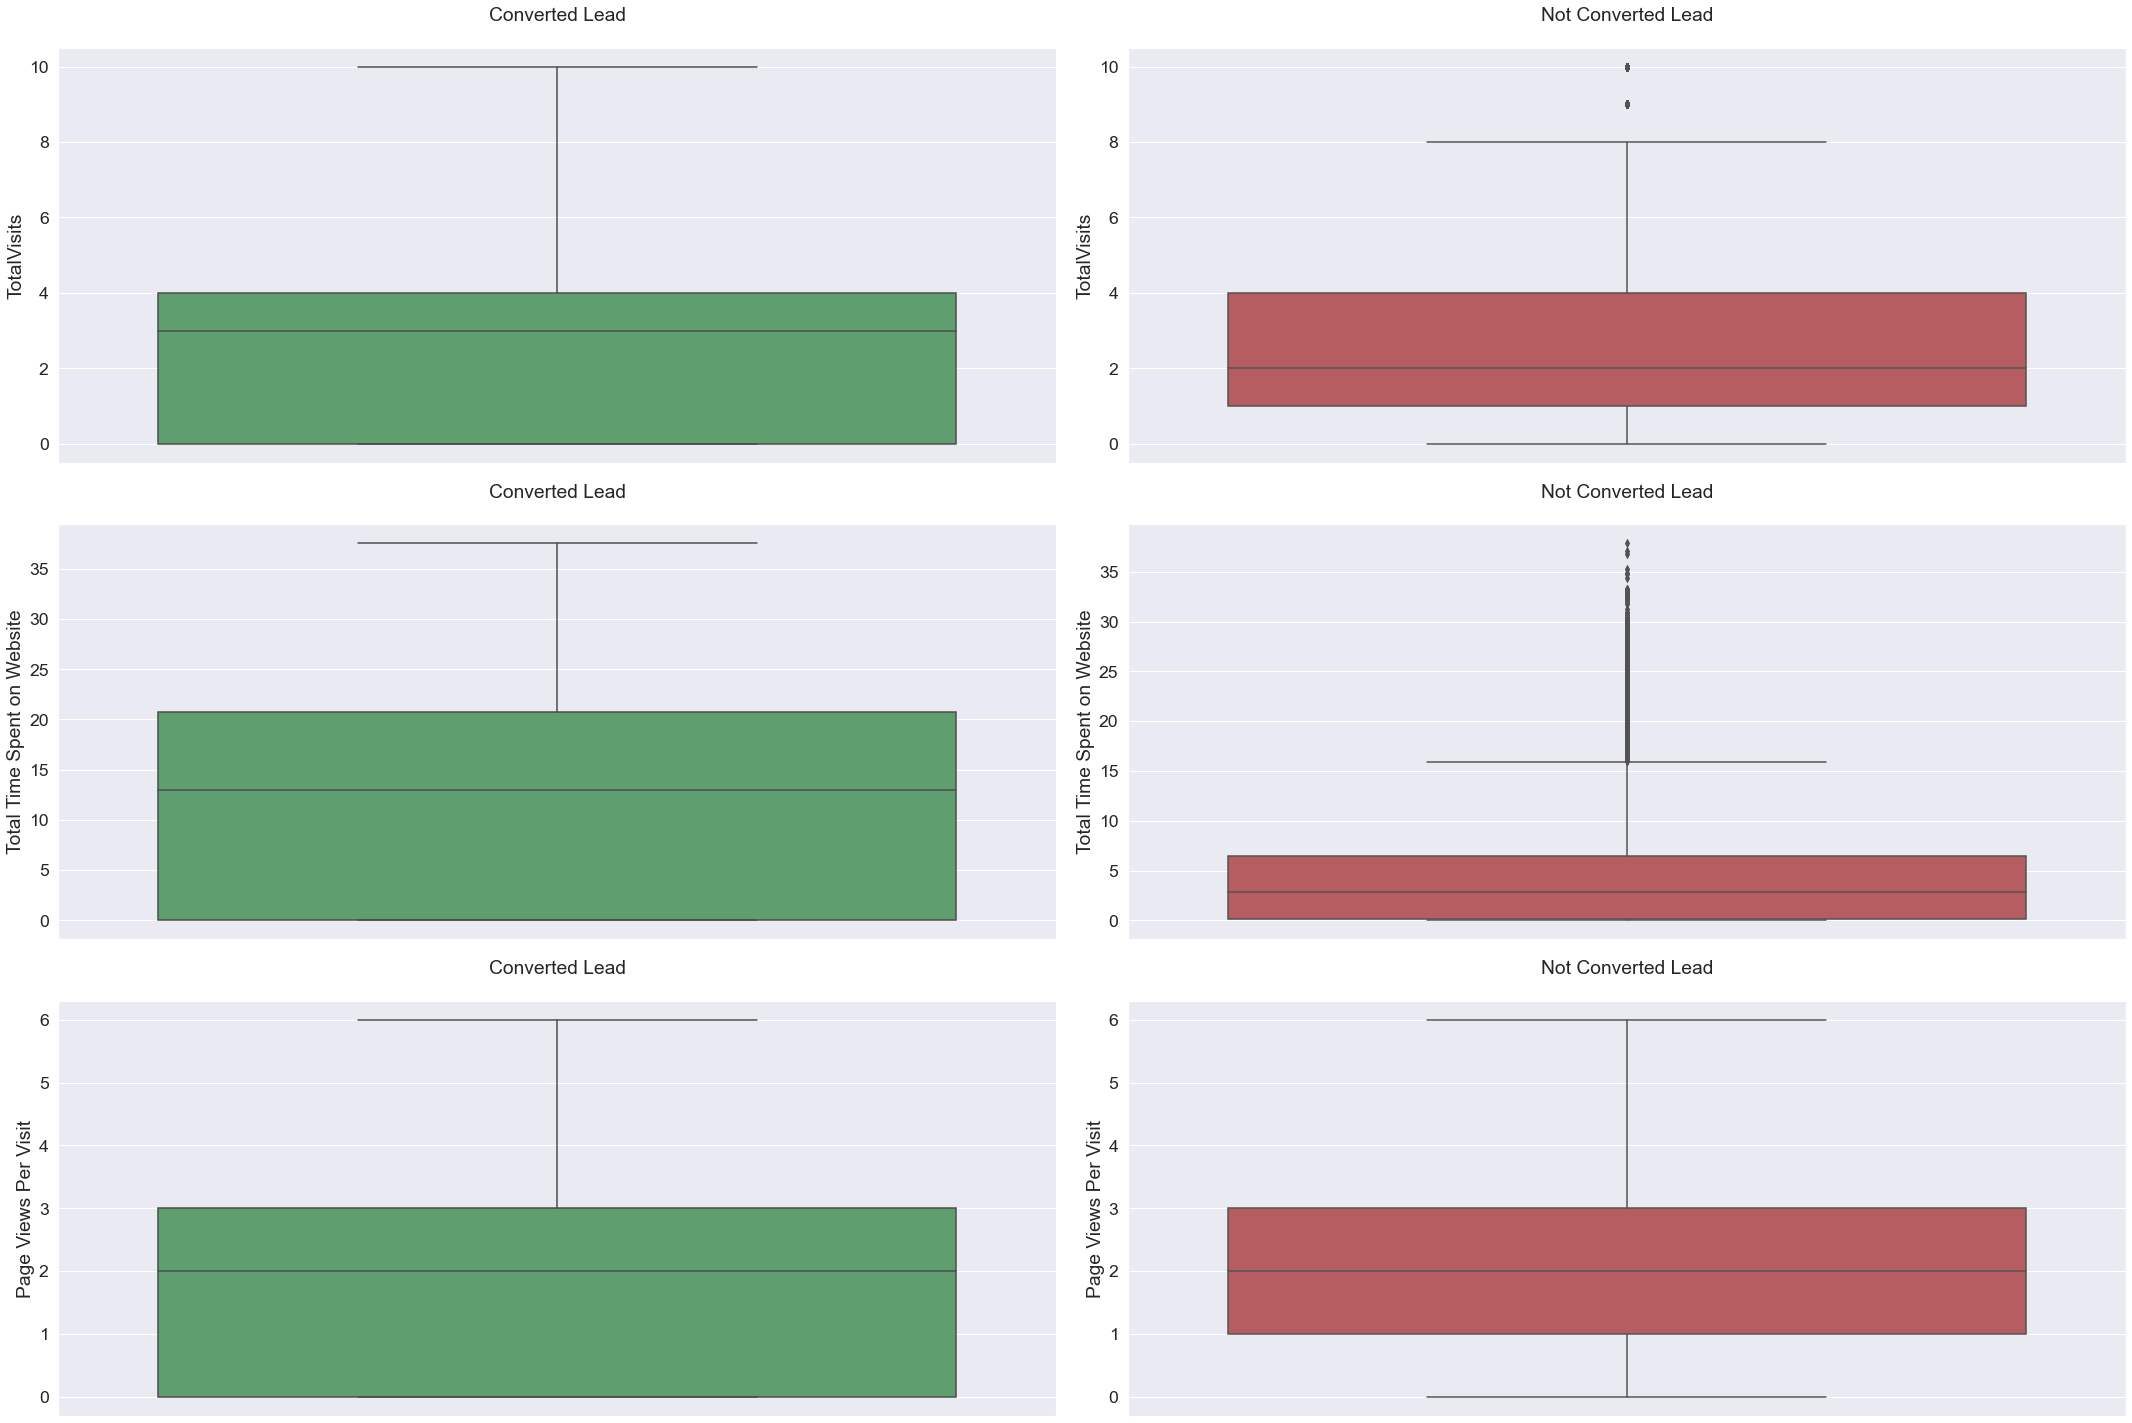

In [1481]:
#Plot boxplot for numerical variable data to observer the range of values
plt.figure(1, figsize=(30, 40))
sns.set(font_scale=1.6)

# subplot 1:
plt.subplot(6, 2, 1)
sns.boxplot(y='TotalVisits', data=leadInfo[leadInfo.Converted==1],color='g')
plt.title("Converted Lead\n")
plt.tight_layout()
plt.subplot(6, 2, 2)
sns.boxplot(y='TotalVisits', data=leadInfo[leadInfo.Converted==0],color='r')
plt.title("Not Converted Lead\n")
plt.tight_layout()


# subplot 2:
plt.subplot(6, 2, 3)
sns.boxplot(y='Total Time Spent on Website', data=leadInfo[leadInfo.Converted==1],color='g')
plt.title("Converted Lead\n")
plt.tight_layout()
plt.subplot(6, 2, 4)
sns.boxplot(y='Total Time Spent on Website', data=leadInfo[leadInfo.Converted==0],color='r')
plt.title("Not Converted Lead\n")
plt.tight_layout()


# subplot 3:
plt.subplot(6, 2, 5)
sns.boxplot(y='Page Views Per Visit', data=leadInfo[leadInfo.Converted==1],color='g')
plt.title("Converted Lead\n")
plt.tight_layout()
plt.subplot(6, 2, 6)
sns.boxplot(y='Page Views Per Visit', data=leadInfo[leadInfo.Converted==0],color='r')
plt.title("Not Converted Lead\n")
plt.tight_layout()


#### Observation
  TBD

#### Task 7.1.2: Visualising Categorical Variables

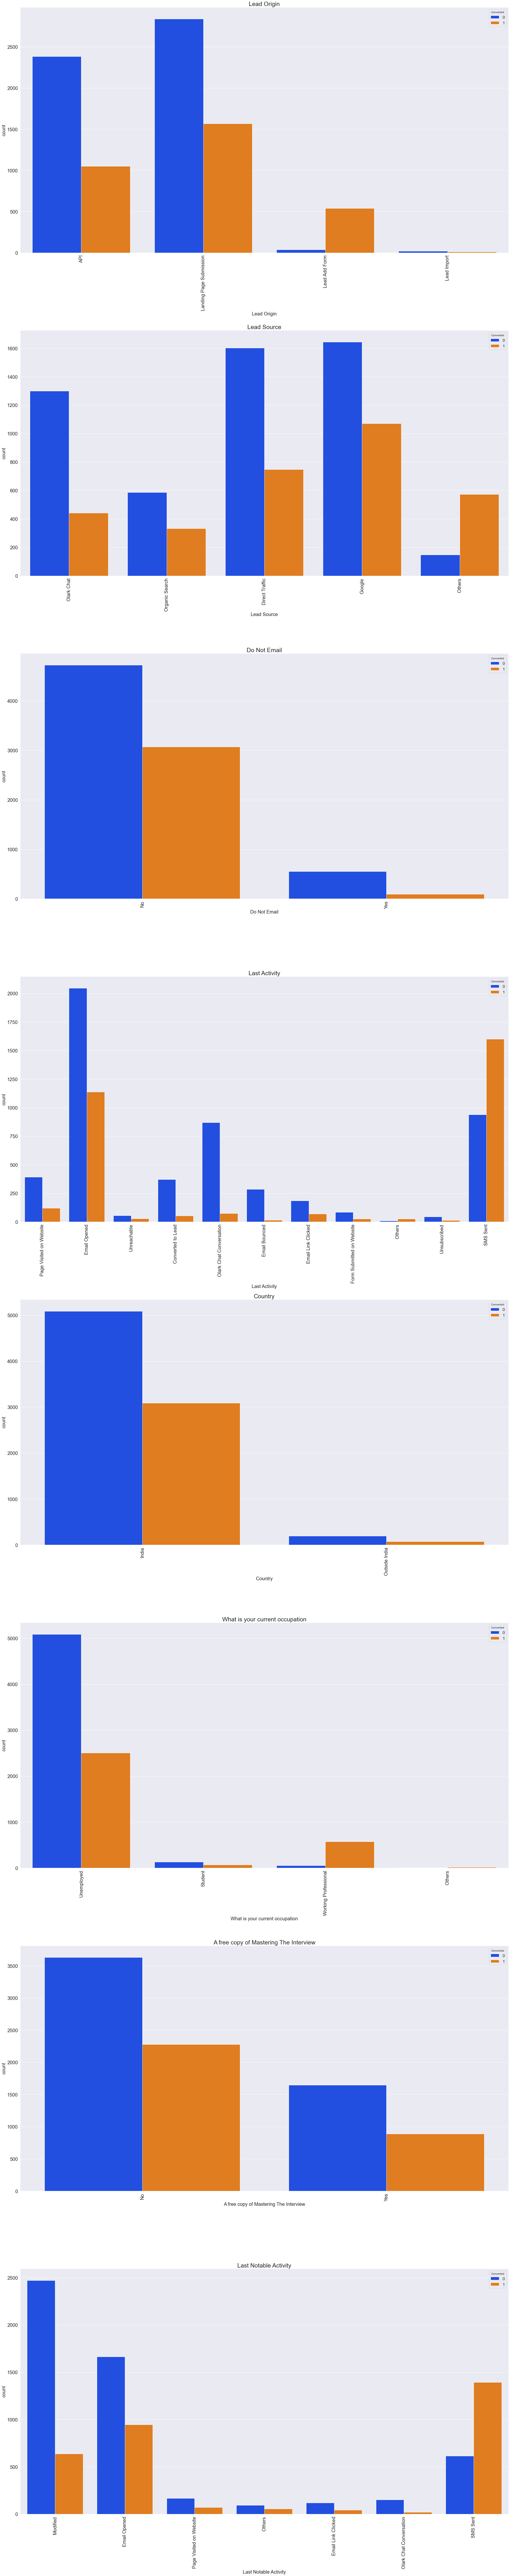

In [1482]:
Required_columns= ['Lead Origin','Lead Source','Do Not Email','Last Activity', 'Country', 'What is your current occupation', 
                   'A free copy of Mastering The Interview','Last Notable Activity']
sns.set_palette("bright")

plt.figure(figsize = (30, 150))

for col in enumerate(Required_columns):
    plt.subplot(8, 1, col[0]+1)
    plt.title(col[1],fontsize=25)
    ax = sns.countplot(data = leadInfo, x=col[1], hue='Converted') 
    plt.xticks(rotation = 90,fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylabel('count',fontsize=20)
    plt.xlabel(col[1],fontsize=20)
    plt.tight_layout()

#### Observation
TBD

### Task 7.2: Data Preparation

#### Step 7.2.1 Converting categorical column which has binary variables (Yes/No) to 0/1

In [1483]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leadInfo[varlist] = leadInfo[varlist].apply(binary_map)
print(leadInfo['Do Not Email'].value_counts())
print(leadInfo['A free copy of Mastering The Interview'].value_counts())


# Defining the map function
def resident_map(x):
    return x.map({'India': 1, "Outside India": 0})


# Applying the function to the housing list
leadInfo['Indian_resident'] = leadInfo[['Country']].apply(resident_map)
leadInfo = leadInfo.drop(['Country'], axis=1)
print(leadInfo['Indian_resident'].value_counts())

0    7795
1     650
Name: Do Not Email, dtype: int64
0    5910
1    2535
Name: A free copy of Mastering The Interview, dtype: int64
1    8178
0     267
Name: Indian_resident, dtype: int64


#### Step 7.2.2 Creating dummy variables for categorical columns which are not binary

In [1484]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leadInfo[['Lead Origin',
'Lead Source',
'Last Activity',
'What is your current occupation',
'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leadInfo = pd.concat([leadInfo, dummy1], axis=1)
pd.set_option('display.max_columns', None)
leadInfo.drop(['Lead Origin',
'Lead Source',
'Last Activity',
'What is your current occupation',
'Last Notable Activity'],axis=1,inplace=True)
leadInfo.head()

Prospect ID  Lead Number  Do Not Email  Converted  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737             0          0   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728             0          0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727             0          1   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719             0          0   
4  3256f628-e534-4826-9d63-4a8b88782852       660681             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                         0.00                   0.0   
1          5.0                        11.23                   2.0   
2          2.0                        25.53                   2.0   
3          1.0                         5.08                   1.0   
4          2.0                        23.80                   1.0   

   A free copy of Mastering The Interview  Indian_resident  \
0                                       0                1   
1                                       0                1   
2                                       1                1   
3                                       0                1   
4                                       0                1   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
0                        0                   0                       1   
1                        0                   0                       0   
2                        0                   0                       0   
3                        0                   0                       0   
4                        0                   1                       0   

   Lead Source_Organic Search  Lead Source_Others  \
0                           0                   0   
1                           1                   0   
2                           0                   0   
3                           0                   0   
4                           0                   0   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0                           0                                        0   
1                           1                                        0   
2                           1                                        0   
3                           0                                        0   
4                           0                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                                      0                     0   
4                                      0                     0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0           

#### Step 7.2.3 Removing Un-necessary columns

In [1485]:
# Dropping ID columns which has no value in analysis
leadInfo = leadInfo.drop(['Prospect ID','Lead Number'], axis=1)

In [1486]:
print(leadInfo.info())
print(leadInfo.shape)
print(round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2).sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8445 entries, 0 to 9239
Data columns (total 33 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          8445 non-null   int64  
 1   Converted                                             8445 non-null   int64  
 2   TotalVisits                                           8445 non-null   float64
 3   Total Time Spent on Website                           8445 non-null   float64
 4   Page Views Per Visit                                  8445 non-null   float64
 5   A free copy of Mastering The Interview                8445 non-null   int64  
 6   Indian_resident                                       8445 non-null   int64  
 7   Lead Origin_Landing Page Submission                   8445 non-null   uint8  
 8   Lead Origin_Lead Add Form                             8445

### Task 8: Correlation between variables

In [1487]:
# Checking variables relationship with each other
leadInfo_corr = leadInfo.corr()
fig=plt.figure(figsize=(150,150))
sns.heatmap(leadInfo_corr,square=True, cmap='RdYlGn',fmt = '.2g',annot=True, annot_kws={"fontsize":70,"weight": "bold"})
plt.xticks(fontsize=70, weight='bold')
plt.yticks(fontsize=70, weight='bold')

plt.show()

In [1488]:
#Identifying Highly co-related values by highlighting in yellow

leadInfo_corr.style.applymap(lambda x: 'background-color : yellow' if ((x>=0.6 or x <= -0.6) and (x !=1.000000)) else '')

### Observations

1. Last Activity_Email Bounced & Do Not Email --Also Do Not Email is highly co-related to converted
2. Page Views Per Visit & Total Visits are highly corelated --Also Total Visits highly co-related to converted
3. Lead Source_Others & Lead Origin_Lead Add Form are highly corelated --Also Lead Origin_Lead Add Form is highly correlated to Converted
4. Last Activity_Email Opened & Last Notable Activity_Email Opened are highly corelated --Also Last Activity_Email Opened is highly correlated to Converted
5. Last Activity_Page Visited on Website & Last Notable Activity_Page Visited on Website are highly corelated --Also Last Activity_Page Visited on Website is highly correlated to Converted
6. Last Notable Activity_SMS Sent  & Last Activity_SMS Sent are highly corelated-- Also Last Notable Activity_SMS Sent is highly correlated to Converted
7. What is your current occupation_Unemployed & What is your current occupation_Working Professional are highly corelated--Also  What is your current occupation_Working Professional is highly correlated to converted
8. Last Notable Activity_Email Opened & Last Activity_Email Opened are highly corelated-- Also Last Activity_Email Opened corelated to Converted



In [1489]:
#based on above observation following highly corelated Independent variables can be dropped
leadInfo = leadInfo.drop(['Last Activity_Email Bounced','Page Views Per Visit',
                          'Lead Source_Others','Last Notable Activity_Email Opened',
                          'Last Notable Activity_Page Visited on Website','Last Activity_SMS Sent',
                          'What is your current occupation_Unemployed','Last Notable Activity_Email Opened'
                         ], axis=1)

In [1490]:
print(leadInfo.info())
print(leadInfo.shape)
print(round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2).sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8445 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          8445 non-null   int64  
 1   Converted                                             8445 non-null   int64  
 2   TotalVisits                                           8445 non-null   float64
 3   Total Time Spent on Website                           8445 non-null   float64
 4   A free copy of Mastering The Interview                8445 non-null   int64  
 5   Indian_resident                                       8445 non-null   int64  
 6   Lead Origin_Landing Page Submission                   8445 non-null   uint8  
 7   Lead Origin_Lead Add Form                             8445 non-null   uint8  
 8   Lead Origin_Lead Import                               8445

### Task 9: Test Train Split

In [1491]:
from sklearn.model_selection import train_test_split

In [1492]:
# Putting feature variable to X

X = leadInfo.drop(['Converted'], axis=1)
X.head()

# Putting response variable to y

y = leadInfo['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1493]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [1494]:
### Checking the Conversion Rate percentage

converted = round((sum(leadInfo['Converted'])/len(leadInfo['Converted'].index))*100,1)
converted

37.5

### Step 10: Rescaling the features with Standard Scaling

In [1495]:
from sklearn.preprocessing import StandardScaler

In [1496]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website']])

X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
5279             1    -0.314975                    -0.504456   
3099             0    -0.314975                    -0.480007   
91               0     1.396648                     1.279232   
1577             0    -1.170787                    -0.865639   
487              0    -0.314975                    -0.617812   

      A free copy of Mastering The Interview  Indian_resident  \
5279                                       0                1   
3099                                       0                1   
91                                         1                1   
1577                                       0                1   
487                                        0                1   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
5279                                    1                          0   
3099                                    1                          0   
91                                      0                          0   
1577                                    0                          1   
487                                     0                          0   

      Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
5279                        0                   0                       0   
3099                        0                   0                       0   
91                          0                   0                       1   
1577                        0                   0                       0   
487                         0                   1                       0   

      Lead Source_Organic Search  Last Activity_Email Link Clicked  \
5279                           0                                 0   
3099                           0                                 0   
91                             0                                 0   
1577                           0                                 0   
487                            0                                 0   

      Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
5279                           0                                        0   
3099                           0                                        0   
91                             1                                        0   
1577                           1                                        0   
487                            1                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
5279                                      0                     0   
3099                                      0                     0   
91                                        0                     0   
1577                                      0                     0   
487                                       0                     0   

      Last Activity_Page Visited on Website  Last Activity_Unreachable  \
5279                                      0                          0   
3099                                      0                          0   
91                                        0                          0   
1577                                      0                          0   
487                                       0                          0   

      Last Activity_Unsubscribed  What is your current occupation_Student  \
5279                           0                                        0   
3099                           0                                        0   
91                             0                                        0   
1577                           0                                        0   
487                            0                                        0   

      What is your current occupation_Working Professional  \
5279                                                  0      
309

### Step 11: Model Building

In [1497]:
import statsmodels.api as sm

In [1498]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5885
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2488.9
Date:                Thu, 13 May 2021   Deviance:                       4977.7
Time:                        15:17:55   Pearson chi2:                 6.01e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7346      0.283     -6.130      0.000      -2.289      -1.180
Do Not Email                                            -1.3842      0.197     -7.037      0.000      -1.770      -0.999
TotalVisits                                              0.2103      0.049      4.253      0.000       0.113       0.307
Total Time Spent on Website                              1.0691      0.041     25.790      0.000       0.988       1.150
A free copy of Mastering The Interview                   0.0368      0.111      0.331      0.741      -0.181       0.255
Indian_resident                                          0.1779      0.212      0.838      0.402      -0.238       0.594
Lead Origin_Landing Page Submission                     -0.2550      0.106     -2.395      0.017      -0.464      -0.046
Lead Origin_Lead Add Form                                4.4547      0.250     17.806      0.000       3.964       4.945
Lead Origin_Lead Import                                  1.5897      0.498      3.192      0.001       0.613       2.566
Lead Source_Google                                       0.2495      0.115      2.168      0.030       0.024       0.475
Lead Source_Olark Chat                                   1.4519      0.163      8.900      0.000       1.132       1.772
Lead Source_Organic Search                               0.0402      0.136      0.294      0.768      -0.227       0.308
Last Activity_Email Link Clicked                        -0.2174      0.248     -0.877      0.380      -0.703       0.268
Last Activity_Email Opened                               0.2416      0.154      1.564      0.118      -0.061       0.544
Last Activity_Form Submitted on Website                 -0.3111      0.345     -0.901      0.367      -0.988       0.365
Last Activity_Olark Chat Conversation                   -1.2780      0.211     -6.044      0.000      -1.692      -0.864
Last Activity_Others                                     1.9374      0.698      2.777      0.005       0.570       3.305
Last Activity_Page Visited on Website                   -0.4109      0.200     -2.054      0.040      -0.803      -0.019
Last Activity_Unreachable                                0.2783      0.358      0.777      0.437      -0.424       0.980
Last Activity_Unsubscribed                               0.4005      0.536      0.748      0.455      -0.650       1.451
What is your current occupation_Student                  0.1993      0.239      0.835      0.404      -0.269       0.667
What is your current occupation_Working Professional     2.5685      0.186     13.775      0.000       2.203       2.934
Last Notable Activity_Modified                          -0

#### Step 11.1: Feature Selection Using RFE

In [1499]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1500]:
from sklearn.feature_selection import RFE

# running RFE with 25 variables as output

rfe = RFE(logreg, 20)            
rfe = rfe.fit(X_train, y_train)

In [1501]:
rfe.support_

array([ True, False,  True, False, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True])

In [1502]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('A free copy of Mastering The Interview', False, 6),
 ('Indian_resident', False, 4),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 5),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_Unreachable', True, 1),
 ('Last Activity_Unsubscribed', True, 1),
 ('What is your current occupation_Student', False, 3),
 ('What is your current occupation_Working Professional', True, 1),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable Activity_Ola

In [1503]:
# variables shortlisted by RFE

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object')

#### Step 11.2: Rebuilding Model - Model 2

In [1504]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5890
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2499.5
Date:                Thu, 13 May 2021   Deviance:                       4999.0
Time:                        15:17:56   Pearson chi2:                 6.03e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5082      0.181     -8.314      0.000      -1.864      -1.153
Do Not Email                                            -1.4069      0.195     -7.200      0.000      -1.790      -1.024
Total Time Spent on Website                              1.0816      0.041     26.194      0.000       1.001       1.163
Lead Origin_Landing Page Submission                     -0.2047      0.095     -2.159      0.031      -0.391      -0.019
Lead Origin_Lead Add Form                                4.1601      0.232     17.893      0.000       3.704       4.616
Lead Origin_Lead Import                                  1.2793      0.490      2.613      0.009       0.320       2.239
Lead Source_Google                                       0.2342      0.085      2.756      0.006       0.068       0.401
Lead Source_Olark Chat                                   1.1645      0.135      8.600      0.000       0.899       1.430
Last Activity_Email Link Clicked                        -0.1638      0.247     -0.663      0.508      -0.648       0.321
Last Activity_Email Opened                               0.2924      0.154      1.905      0.057      -0.009       0.593
Last Activity_Form Submitted on Website                 -0.2541      0.343     -0.740      0.459      -0.927       0.419
Last Activity_Olark Chat Conversation                   -1.2181      0.210     -5.794      0.000      -1.630      -0.806
Last Activity_Others                                     1.9770      0.694      2.848      0.004       0.616       3.338
Last Activity_Page Visited on Website                   -0.2623      0.196     -1.341      0.180      -0.646       0.121
Last Activity_Unreachable                                0.3276      0.359      0.912      0.362      -0.376       1.031
Last Activity_Unsubscribed                               0.4424      0.535      0.827      0.408      -0.607       1.491
What is your current occupation_Working Professional     2.5544      0.185     13.783      0.000       2.191       2.918
Last Notable Activity_Modified                          -0.2236      0.121     -1.848      0.065      -0.461       0.014
Last Notable Activity_Olark Chat Conversation           -0.5120      0.426     -1.201      0.230      -1.347       0.323
Last Notable Activity_Others                             1.0909      0.384      2.839      0.005       0.338       1.844
Last Notable Activity_SMS Sent                           1.6593      0.173      9.591      0.000       1.320       1.998
========================================================================================================================
"""

In [1505]:
col = col.drop('Last Activity_Email Link Clicked',1)

#### Step 11.3:  Rebuilding Model - Model 3

In [1506]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5891
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2499.7
Date:                Thu, 13 May 2021   Deviance:                       4999.5
Time:                        15:17:56   Pearson chi2:                 6.04e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5610      0.163     -9.577      0.000      -1.880      -1.242
Do Not Email                                            -1.3951      0.195     -7.165      0.000      -1.777      -1.013
Total Time Spent on Website                              1.0818      0.041     26.196      0.000       1.001       1.163
Lead Origin_Landing Page Submission                     -0.2054      0.095     -2.166      0.030      -0.391      -0.020
Lead Origin_Lead Add Form                                4.1522      0.232     17.888      0.000       3.697       4.607
Lead Origin_Lead Import                                  1.2813      0.490      2.616      0.009       0.321       2.241
Lead Source_Google                                       0.2328      0.085      2.740      0.006       0.066       0.399
Lead Source_Olark Chat                                   1.1562      0.135      8.580      0.000       0.892       1.420
Last Activity_Email Opened                               0.3435      0.133      2.585      0.010       0.083       0.604
Last Activity_Form Submitted on Website                 -0.2245      0.341     -0.659      0.510      -0.892       0.443
Last Activity_Olark Chat Conversation                   -1.1844      0.204     -5.800      0.000      -1.585      -0.784
Last Activity_Others                                     2.0034      0.693      2.890      0.004       0.645       3.362
Last Activity_Page Visited on Website                   -0.2217      0.186     -1.193      0.233      -0.586       0.142
Last Activity_Unreachable                                0.3524      0.357      0.986      0.324      -0.348       1.053
Last Activity_Unsubscribed                               0.4501      0.536      0.840      0.401      -0.600       1.500
What is your current occupation_Working Professional     2.5566      0.185     13.791      0.000       2.193       2.920
Last Notable Activity_Modified                          -0.1984      0.115     -1.733      0.083      -0.423       0.026
Last Notable Activity_Olark Chat Conversation           -0.4867      0.424     -1.147      0.251      -1.319       0.345
Last Notable Activity_Others                             1.1274      0.381      2.962      0.003       0.382       1.873
Last Notable Activity_SMS Sent                           1.7140      0.152     11.266      0.000       1.416       2.012
========================================================================================================================
"""

In [1507]:
col = col.drop('Last Activity_Form Submitted on Website',1)

#### Step 11.4:  Rebuilding Model - Model 4

In [1508]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5892
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2500.0
Date:                Thu, 13 May 2021   Deviance:                       4999.9
Time:                        15:17:56   Pearson chi2:                 6.04e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5723      0.162     -9.688      0.000      -1.890      -1.254
Do Not Email                                            -1.3881      0.195     -7.136      0.000      -1.769      -1.007
Total Time Spent on Website                              1.0817      0.041     26.198      0.000       1.001       1.163
Lead Origin_Landing Page Submission                     -0.2080      0.095     -2.195      0.028      -0.394      -0.022
Lead Origin_Lead Add Form                                4.1516      0.232     17.882      0.000       3.697       4.607
Lead Origin_Lead Import                                  1.2814      0.490      2.615      0.009       0.321       2.242
Lead Source_Google                                       0.2293      0.085      2.705      0.007       0.063       0.395
Lead Source_Olark Chat                                   1.1537      0.135      8.564      0.000       0.890       1.418
Last Activity_Email Opened                               0.3586      0.131      2.736      0.006       0.102       0.616
Last Activity_Olark Chat Conversation                   -1.1672      0.203     -5.759      0.000      -1.564      -0.770
Last Activity_Others                                     2.0189      0.693      2.913      0.004       0.661       3.377
Last Activity_Page Visited on Website                   -0.2058      0.184     -1.116      0.264      -0.567       0.155
Last Activity_Unreachable                                0.3679      0.357      1.031      0.303      -0.332       1.067
Last Activity_Unsubscribed                               0.4547      0.536      0.849      0.396      -0.595       1.505
What is your current occupation_Working Professional     2.5557      0.185     13.795      0.000       2.193       2.919
Last Notable Activity_Modified                          -0.2019      0.114     -1.764      0.078      -0.426       0.022
Last Notable Activity_Olark Chat Conversation           -0.4901      0.424     -1.155      0.248      -1.322       0.342
Last Notable Activity_Others                             1.1308      0.381      2.969      0.003       0.384       1.877
Last Notable Activity_SMS Sent                           1.7281      0.151     11.458      0.000       1.432       2.024
========================================================================================================================
"""

In [1509]:
col = col.drop('Last Activity_Unsubscribed',1)

#### Step 11.5:  Rebuilding Model - Model 5

In [1510]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5893
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2500.3
Date:                Thu, 13 May 2021   Deviance:                       5000.6
Time:                        15:17:56   Pearson chi2:                 6.04e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5696      0.162     -9.676      0.000      -1.888      -1.252
Do Not Email                                            -1.3678      0.192     -7.109      0.000      -1.745      -0.991
Total Time Spent on Website                              1.0818      0.041     26.203      0.000       1.001       1.163
Lead Origin_Landing Page Submission                     -0.2076      0.095     -2.190      0.029      -0.393      -0.022
Lead Origin_Lead Add Form                                4.1486      0.232     17.876      0.000       3.694       4.603
Lead Origin_Lead Import                                  1.2809      0.490      2.615      0.009       0.321       2.241
Lead Source_Google                                       0.2289      0.085      2.700      0.007       0.063       0.395
Lead Source_Olark Chat                                   1.1537      0.135      8.564      0.000       0.890       1.418
Last Activity_Email Opened                               0.3560      0.131      2.718      0.007       0.099       0.613
Last Activity_Olark Chat Conversation                   -1.1705      0.203     -5.778      0.000      -1.568      -0.773
Last Activity_Others                                     1.9766      0.694      2.847      0.004       0.616       3.338
Last Activity_Page Visited on Website                   -0.2101      0.184     -1.141      0.254      -0.571       0.151
Last Activity_Unreachable                                0.3048      0.352      0.866      0.387      -0.385       0.995
What is your current occupation_Working Professional     2.5516      0.185     13.793      0.000       2.189       2.914
Last Notable Activity_Modified                          -0.2013      0.114     -1.759      0.079      -0.426       0.023
Last Notable Activity_Olark Chat Conversation           -0.4898      0.424     -1.154      0.248      -1.321       0.342
Last Notable Activity_Others                             1.2807      0.335      3.821      0.000       0.624       1.938
Last Notable Activity_SMS Sent                           1.7242      0.151     11.443      0.000       1.429       2.020
========================================================================================================================
"""

In [1511]:
col = col.drop('Last Activity_Unreachable',1)

#### Step 11.6:  Rebuilding Model - Model 6

In [1512]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5894
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2500.7
Date:                Thu, 13 May 2021   Deviance:                       5001.3
Time:                        15:17:56   Pearson chi2:                 6.04e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5589      0.162     -9.646      0.000      -1.876      -1.242
Do Not Email                                            -1.3984      0.190     -7.355      0.000      -1.771      -1.026
Total Time Spent on Website                              1.0807      0.041     26.195      0.000       1.000       1.162
Lead Origin_Landing Page Submission                     -0.2054      0.095     -2.168      0.030      -0.391      -0.020
Lead Origin_Lead Add Form                                4.1492      0.232     17.879      0.000       3.694       4.604
Lead Origin_Lead Import                                  1.2787      0.490      2.611      0.009       0.319       2.239
Lead Source_Google                                       0.2308      0.085      2.723      0.006       0.065       0.397
Lead Source_Olark Chat                                   1.1536      0.135      8.565      0.000       0.890       1.418
Last Activity_Email Opened                               0.3432      0.130      2.640      0.008       0.088       0.598
Last Activity_Olark Chat Conversation                   -1.1846      0.202     -5.869      0.000      -1.580      -0.789
Last Activity_Others                                     1.9433      0.696      2.793      0.005       0.580       3.307
Last Activity_Page Visited on Website                   -0.2217      0.184     -1.207      0.227      -0.582       0.138
What is your current occupation_Working Professional     2.5483      0.185     13.787      0.000       2.186       2.911
Last Notable Activity_Modified                          -0.1983      0.114     -1.735      0.083      -0.422       0.026
Last Notable Activity_Olark Chat Conversation           -0.4860      0.424     -1.145      0.252      -1.317       0.346
Last Notable Activity_Others                             1.3710      0.317      4.322      0.000       0.749       1.993
Last Notable Activity_SMS Sent                           1.7135      0.150     11.420      0.000       1.419       2.008
========================================================================================================================
"""

In [1513]:
col = col.drop('Last Notable Activity_Olark Chat Conversation',1)

#### Step 11.7:  Rebuilding Model - Model 7

In [1514]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5895
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2501.4
Date:                Thu, 13 May 2021   Deviance:                       5002.7
Time:                        15:17:56   Pearson chi2:                 6.04e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5896      0.159     -9.976      0.000      -1.902      -1.277
Do Not Email                                            -1.4012      0.190     -7.377      0.000      -1.774      -1.029
Total Time Spent on Website                              1.0783      0.041     26.190      0.000       0.998       1.159
Lead Origin_Landing Page Submission                     -0.2067      0.095     -2.183      0.029      -0.392      -0.021
Lead Origin_Lead Add Form                                4.1389      0.232     17.867      0.000       3.685       4.593
Lead Origin_Lead Import                                  1.2718      0.489      2.598      0.009       0.312       2.231
Lead Source_Google                                       0.2294      0.085      2.708      0.007       0.063       0.395
Lead Source_Olark Chat                                   1.1499      0.135      8.539      0.000       0.886       1.414
Last Activity_Email Opened                               0.3696      0.128      2.892      0.004       0.119       0.620
Last Activity_Olark Chat Conversation                   -1.2811      0.188     -6.808      0.000      -1.650      -0.912
Last Activity_Others                                     1.9391      0.695      2.789      0.005       0.576       3.302
Last Activity_Page Visited on Website                   -0.2075      0.183     -1.134      0.257      -0.566       0.151
What is your current occupation_Working Professional     2.5496      0.185     13.788      0.000       2.187       2.912
Last Notable Activity_Modified                          -0.1601      0.109     -1.467      0.142      -0.374       0.054
Last Notable Activity_Others                             1.4063      0.316      4.456      0.000       0.788       2.025
Last Notable Activity_SMS Sent                           1.7466      0.147     11.865      0.000       1.458       2.035
========================================================================================================================
"""

In [1515]:
col = col.drop('Last Activity_Page Visited on Website',1)

#### Step 11.8:  Rebuilding Model - Model 8

In [1516]:
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5896
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2502.0
Date:                Thu, 13 May 2021   Deviance:                       5004.0
Time:                        15:17:56   Pearson chi2:                 6.05e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6624      0.146    -11.375      0.000      -1.949      -1.376
Do Not Email                                            -1.4002      0.190     -7.369      0.000      -1.773      -1.028
Total Time Spent on Website                              1.0769      0.041     26.188      0.000       0.996       1.157
Lead Origin_Landing Page Submission                     -0.2058      0.095     -2.174      0.030      -0.391      -0.020
Lead Origin_Lead Add Form                                4.1470      0.232     17.897      0.000       3.693       4.601
Lead Origin_Lead Import                                  1.2789      0.490      2.611      0.009       0.319       2.239
Lead Source_Google                                       0.2296      0.085      2.712      0.007       0.064       0.396
Lead Source_Olark Chat                                   1.1531      0.135      8.564      0.000       0.889       1.417
Last Activity_Email Opened                               0.4358      0.114      3.820      0.000       0.212       0.659
Last Activity_Olark Chat Conversation                   -1.2322      0.183     -6.717      0.000      -1.592      -0.873
Last Activity_Others                                     1.9731      0.696      2.836      0.005       0.609       3.337
What is your current occupation_Working Professional     2.5521      0.185     13.801      0.000       2.190       2.915
Last Notable Activity_Modified                          -0.1329      0.106     -1.251      0.211      -0.341       0.075
Last Notable Activity_Others                             1.4762      0.310      4.766      0.000       0.869       2.083
Last Notable Activity_SMS Sent                           1.8179      0.133     13.624      0.000       1.556       2.079
========================================================================================================================
"""

In [1517]:
col = col.drop('Last Notable Activity_Modified',1)

#### Step 11.9:  Rebuilding Model - Model 9

In [1518]:
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5897
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2502.8
Date:                Thu, 13 May 2021   Deviance:                       5005.6
Time:                        15:17:56   Pearson chi2:                 6.06e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7714      0.118    -15.035      0.000      -2.002      -1.540
Do Not Email                                            -1.4064      0.190     -7.409      0.000      -1.778      -1.034
Total Time Spent on Website                              1.0777      0.041     26.215      0.000       0.997       1.158
Lead Origin_Landing Page Submission                     -0.2022      0.095     -2.139      0.032      -0.388      -0.017
Lead Origin_Lead Add Form                                4.1477      0.232     17.902      0.000       3.694       4.602
Lead Origin_Lead Import                                  1.2727      0.489      2.602      0.009       0.314       2.231
Lead Source_Google                                       0.2283      0.085      2.697      0.007       0.062       0.394
Lead Source_Olark Chat                                   1.1572      0.135      8.599      0.000       0.893       1.421
Last Activity_Email Opened                               0.5170      0.094      5.504      0.000       0.333       0.701
Last Activity_Olark Chat Conversation                   -1.2298      0.183     -6.711      0.000      -1.589      -0.871
Last Activity_Others                                     1.9523      0.695      2.808      0.005       0.590       3.315
What is your current occupation_Working Professional     2.5549      0.185     13.825      0.000       2.193       2.917
Last Notable Activity_Others                             1.5878      0.297      5.351      0.000       1.006       2.169
Last Notable Activity_SMS Sent                           1.9247      0.103     18.680      0.000       1.723       2.127
========================================================================================================================
"""

##### Checking VIFs

In [1519]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6                              Lead Source_Olark Chat  2.14
2                 Lead Origin_Landing Page Submission  2.12
7                          Last Activity_Email Opened  2.09
12                     Last Notable Activity_SMS Sent  1.73
8               Last Activity_Olark Chat Conversation  1.62
5                                  Lead Source_Google  1.51
3                           Lead Origin_Lead Add Form  1.37
1                         Total Time Spent on Website  1.33
0                                        Do Not Email  1.26
11                       Last Notable Activity_Others  1.20
10  What is your current occupation_Working Profes...  1.17
9                                Last Activity_Others  1.06
4                             Lead Origin_Lead Import  1.02

In [1520]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5279    0.019386
3099    0.362128
91      0.782686
1577    0.876580
487     0.155530
758     0.147375
7260    0.143527
7538    0.657747
2404    0.109206
8190    0.966695
dtype: float64

In [1521]:
# Reshape

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.01938634, 0.36212785, 0.78268633, 0.87657981, 0.1555304 ,
       0.1473747 , 0.14352744, 0.65774746, 0.10920602, 0.96669521])

In [1522]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  LeadId
0          0        0.019386    5279
1          0        0.362128    3099
2          1        0.782686      91
3          1        0.876580    1577
4          0        0.155530     487

In [1523]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  LeadId  predicted
0          0        0.019386    5279          0
1          0        0.362128    3099          0
2          1        0.782686      91          1
3          1        0.876580    1577          1
4          0        0.155530     487          0

##### Lets check the confusion metrics and accuracy

In [1524]:
from sklearn import metrics

In [1525]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3286  408]
 [ 711 1506]]


In [1526]:
# Predicted     not_converted    converted
# Actual
# not_converted        3286        408
# converted            711        1506

In [1527]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8106919302994418


##### Metrics - Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [1528]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1529]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.6792963464140731

In [1530]:
# Let us calculate specificity

TN / float(TN+FP)

0.889550622631294

In [1531]:
# Calculate false postive rate - predicting non conversion when leads have converted

print(FP/ float(TN+FP))

0.11044937736870601


In [1532]:
# positive predictive value 

print (TP / float(TP+FP))

0.786833855799373


In [1533]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8221165874405805


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [1534]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1535]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

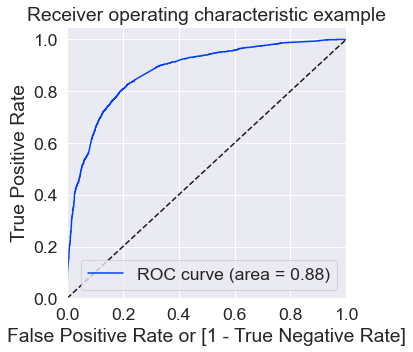

In [1536]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

In [1537]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  LeadId  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0        0.019386    5279          0    1    0    0    0    0    0   
1          0        0.362128    3099          0    1    1    1    1    0    0   
2          1        0.782686      91          1    1    1    1    1    1    1   
3          1        0.876580    1577          1    1    1    1    1    1    1   
4          0        0.155530     487          0    1    1    0    0    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    1    1    0    0  
3    1    1    1    0  
4    0    0    0    0

In [1538]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375063  1.000000  0.000000
0.1   0.1  0.593808  0.967073  0.369789
0.2   0.2  0.743191  0.905728  0.645642
0.3   0.3  0.799019  0.826793  0.782350
0.4   0.4  0.810354  0.757781  0.841906
0.5   0.5  0.810692  0.679296  0.889551
0.6   0.6  0.787176  0.557510  0.925014
0.7   0.7  0.779394  0.494362  0.950460
0.8   0.8  0.760277  0.406405  0.972658
0.9   0.9  0.703773  0.229138  0.988630


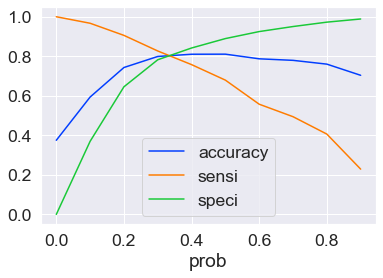

In [1539]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [1540]:
# Let us make the final prediction using 0.35 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  LeadId  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0        0.019386    5279          0    1    0    0    0    0    0   
1          0        0.362128    3099          0    1    1    1    1    0    0   
2          1        0.782686      91          1    1    1    1    1    1    1   
3          1        0.876580    1577          1    1    1    1    1    1    1   
4          0        0.155530     487          0    1    1    0    0    0    0   

   0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0                0  
1    0    0    0    0                1  
2    1    1    0    0                1  
3    1    1    1    0                1  
4    0    0    0    0                0

In [1541]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

Converted  Converted_Prob  LeadId  predicted  0.0  0.1  0.2  0.3  0.4  \
0           0        0.019386    5279          0    1    0    0    0    0   
1           0        0.362128    3099          0    1    1    1    1    0   
2           1        0.782686      91          1    1    1    1    1    1   
3           1        0.876580    1577          1    1    1    1    1    1   
4           0        0.155530     487          0    1    1    0    0    0   
5           0        0.147375     758          0    1    1    0    0    0   
6           0        0.143527    7260          0    1    1    0    0    0   
7           0        0.657747    7538          1    1    1    1    1    1   
8           0        0.109206    2404          0    1    1    0    0    0   
9           0        0.966695    8190          1    1    1    1    1    1   
10          1        0.912464    6458          1    1    1    1    1    1   
11          0        0.113136     442          0    1    1    0    0    0   
12          0        0.606990    8418          1    1    1    1    1    1   
13          0        0.058592    8550          0    1    0    0    0    0   
14          0        0.094993    5829          0    1    0    0    0    0   
15          0        0.263078    8221          0    1    1    1    0    0   
16          1        0.876580    4057          1    1    1    1    1    1   
17          1        0.794929    5258          1    1    1    1    1    1   
18          0        0.263078    1917          0    1    1    1    0    0   
19          1        0.989178    7674          1    1    1    1    1    1   

    0.5  0.6  0.7  0.8  0.9  final_predicted  lead_score  
0     0    0    0    0    0                0           2  
1     0    0    0    0    0                1          36  
2     1    1    1    0    0                1          78  
3     1    1    1    1    0                1          88  
4     0    0    0    0    0                0          16  
5     0    0    0    0    0                0          15  
6     0    0    0    0    0                0          14  
7     1    1    0    0    0                1          66  
8     0    0    0    0    0                0          11  
9     1    1    1    1    1                1          97  
10    1    1    1    1    1                1          91  
11    0    0    0    0    0                0          11  
12    1    1    0    0    0                1          61  
13    0    0    0    0    0                0           6  
14    0    0    0    0    0                0           9  
15    0    0    0    0    0                0          26  
16    1    1    1    1    0                1          88  
17    1    1    1    0    0                1          79  
18    0    0    0    0    0                0          26  
19    1    1    1    1    1                1          99

In [1542]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1766
0     451
Name: final_predicted, dtype: int64

In [1543]:
# check the precentage of final_predicted conversions

print(1766/float(1766+451))

final_conversion_percent=round(1766/float(1766+451)*100)

        
print('Precentage of final_predicted conversions:= ',final_conversion_percent,'%')      

0.7965719440685611
Precentage of final_predicted conversions:=  80 %


#### Observation
Hence we can see that the final prediction of conversions have a target of 80% (79.7%) conversion as per the X Educations CEO's requirement . Hence this is a good model.

### Overall Evaluation Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value  on final prediction on train set

In [1544]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8064625274911182

In [1545]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3001,  693],
       [ 451, 1766]], dtype=int64)

In [1546]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1547]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7965719440685611

In [1548]:
# Let us calculate specificity

TN / float(TN+FP)

0.8123984840281537

In [1549]:
# Calculate false postive rate - predicting conversions when leads has not converted

print(FP/ float(TN+FP))

0.18760151597184624


In [1550]:
# Positive predictive value 

print (TP / float(TP+FP))

0.7181781211874746


In [1551]:
# Negative predictive value

print (TN / float(TN+ FN))

0.869351100811124


### Evaluation Metrics - Precision and Recall

In [1552]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3286,  408],
       [ 711, 1506]], dtype=int64)

In [1553]:
from sklearn.metrics import precision_score, recall_score

In [1554]:
# precision

precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.786833855799373

In [1555]:
# recall

recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6792963464140731

In [1556]:
from sklearn.metrics import precision_recall_curve

In [1557]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       0
 5       0
 6       0
 7       0
 8       0
 9       0
 10      1
 11      0
 12      0
 13      0
 14      0
 15      0
 16      1
 17      1
 18      0
 19      1
 20      1
 21      0
 22      0
 23      0
 24      0
 25      0
 26      1
 27      0
 28      0
 29      1
 30      0
 31      1
 32      0
 33      0
 34      0
 35      1
 36      1
 37      0
 38      0
 39      1
 40      1
 41      0
 42      0
 43      0
 44      0
 45      0
 46      1
 47      1
 48      1
 49      0
 50      0
 51      1
 52      1
 53      0
 54      0
 55      1
 56      1
 57      1
 58      0
 59      1
 60      0
 61      0
 62      0
 63      1
 64      0
 65      1
 66      0
 67      0
 68      0
 69      0
 70      1
 71      1
 72      0
 73      0
 74      0
 75      1
 76      0
 77      0
 78      0
 79      1
 80      0
 81      1
 82      0
 83      0
 84      0
 85      1
 86      1
 87      0
 88      0
 89      0
 90      1

In [1558]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

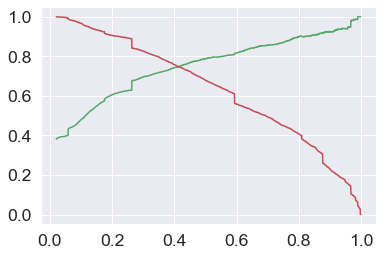

In [1559]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [1560]:
X_test[['TotalVisits','Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website']])

In [1561]:
X_test = X_test[col]
X_test.head()

Do Not Email  Total Time Spent on Website  \
1926             0                    -0.865639   
5654             0                    -0.865639   
1209             0                    -0.482229   
5234             0                    -0.084372   
8497             0                    -0.476673   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1926                                    0                          0   
5654                                    0                          0   
1209                                    1                          0   
5234                                    1                          0   
8497                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
1926                        0                   0                       1   
5654                        0                   0                       1   
1209                        0                   0                       0   
5234                        0                   0                       0   
8497                        0                   0                       0   

      Last Activity_Email Opened  Last Activity_Olark Chat Conversation  \
1926                           1                                      0   
5654                           0                                      1   
1209                           1                                      0   
5234                           1                                      0   
8497                           1                                      0   

      Last Activity_Others  \
1926                     0   
5654                     0   
1209                     0   
5234                     0   
8497                     0   

      What is your current occupation_Working Professional  \
1926                                                  1      
5654                                                  1      
1209                                                  1      
5234                                                  0      
8497                                                  0      

      Last Notable Activity_Others  Last Notable Activity_SMS Sent  
1926                             0                               0  
5654                             0                               0  
1209                             0                               0  
5234                             0                               0  
8497                             0                               0

In [1562]:
X_test_sm = sm.add_constant(X_test)

In [1563]:
y_test_pred = res.predict(X_test_sm)

In [1564]:
y_test_pred[:10]

1926    0.821255
5654    0.444760
1209    0.640750
5234    0.175443
8497    0.122357
1918    0.077407
7405    0.328573
6561    0.049576
5492    0.830221
7851    0.987062
dtype: float64

In [1565]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [1566]:
# Let's see the head

y_pred_1.head()

0
1926  0.821255
5654  0.444760
1209  0.640750
5234  0.175443
8497  0.122357

In [1567]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [1568]:
# Putting LeadId to index

y_test_df['LeadId'] = y_test_df.index

In [1569]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1570]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1571]:
y_pred_final.head()

Converted  LeadId         0
0          1    1926  0.821255
1          0    5654  0.444760
2          0    1209  0.640750
3          0    5234  0.175443
4          0    8497  0.122357

In [1572]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [1573]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['LeadId','Converted','Converted_Prob'], axis=1)

In [1574]:
y_pred_final.head()

LeadId  Converted  Converted_Prob
0    1926          1        0.821255
1    5654          0        0.444760
2    1209          0        0.640750
3    5234          0        0.175443
4    8497          0        0.122357

In [1575]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.35%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [1576]:
y_pred_final.head()

LeadId  Converted  Converted_Prob  final_predicted
0    1926          1        0.821255                1
1    5654          0        0.444760                1
2    1209          0        0.640750                1
3    5234          0        0.175443                0
4    8497          0        0.122357                0

In [1577]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

LeadId  Converted  Converted_Prob  final_predicted  lead_score
0     1926          1        0.821255                1          82
1     5654          0        0.444760                1          44
2     1209          0        0.640750                1          64
3     5234          0        0.175443                0          18
4     8497          0        0.122357                0          12
5     1918          0        0.077407                0           8
6     7405          0        0.328573                0          33
7     6561          0        0.049576                0           5
8     5492          1        0.830221                1          83
9     7851          1        0.987062                1          99
10    2472          1        0.619690                1          62
11    1651          1        0.654453                1          65
12      99          1        0.674883                1          67
13     655          0        0.189457                0          19
14    1628          1        0.263078                0          26
15    5882          1        0.876580                1          88
16    4516          0        0.093764                0           9
17    6738          0        0.427836                1          43
18     357          0        0.089480                0           9
19    5065          0        0.078298                0           8

In [1578]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    775
0    173
Name: final_predicted, dtype: int64

In [1579]:
# check the precentage of final_predicted conversions on test data

775/float(775+173)

0.8175105485232067

### Observation 
We can see that the final prediction of conversions have a target rate of 81%  required by the X Educations CEO's requirement . Hence this is a good model.

### Overall Evaluation Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity  on test set

In [1580]:
# Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8157063930544594

In [1581]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1292,  294],
       [ 173,  775]], dtype=int64)

In [1582]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1583]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8175105485232067

In [1584]:
# Let us calculate specificity
TN / float(TN+FP)

0.8146279949558638

#### Observation 
  We can see that the True positive Identification percentage is around 81% and True Negatives Identification are around 81%

### Precision and Recall Evaluation metrics for the test set 

In [1585]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.724976613657624
recall  0.8175105485232067


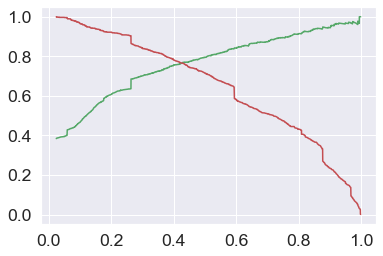

In [1586]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Conclusion